In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 81)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
cb = CatBoostRegressor(random_state=1, verbose=False)
cb_1000 = CatBoostRegressor(random_state=1, verbose=False, iterations=1000)
ridge = Ridge()
lasso = Lasso()

In [6]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [7]:
cat = evaluate_model(cb, X, y)

In [8]:
#cat

In [9]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [10]:
cat

,cat_score
0,0.920566
1,0.899820
2,0.938045
3,0.933383
4,0.949361
5,0.934502
6,0.944618
7,0.924652
8,0.947610
9,0.883656


In [11]:
cat_1000 = evaluate_model(cb_1000, X, y)

In [12]:
cat_1000 = cat_1000[['test_score']].rename(columns={'test_score':'cat1000_score'})

In [13]:
cat_1000

,cat1000_score
0,0.920566
1,0.899820
2,0.938045
3,0.933383
4,0.949361
5,0.934502
6,0.944618
7,0.924652
8,0.947610
9,0.883656


In [15]:
combo = pd.concat([cat, cat_1000], axis=1)

In [16]:
combo

,cat_score,cat1000_score
0,0.920566,0.920566
1,0.899820,0.899820
2,0.938045,0.938045
3,0.933383,0.933383
4,0.949361,0.949361
5,0.934502,0.934502
6,0.944618,0.944618
7,0.924652,0.924652
8,0.947610,0.947610
9,0.883656,0.883656


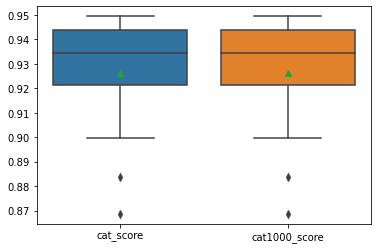

In [17]:
sns.boxplot(data=combo, showmeans=True);

In [18]:
combo.describe()

,cat_score,cat1000_score
count,15.000000,15.000000
mean,0.926385,0.926385
std,0.024378,0.024378
min,0.868666,0.868666
25%,0.921228,0.921228
50%,0.934502,0.934502
75%,0.943737,0.943737
max,0.949361,0.949361
